In [21]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from numpy import sqrt

In [50]:
msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")['Close']

In [51]:
hist

Date
1986-03-13      0.061491
1986-03-14      0.063687
1986-03-17      0.064785
1986-03-18      0.063138
1986-03-19      0.062040
                 ...    
2021-10-12    292.880005
2021-10-13    296.309998
2021-10-14    302.750000
2021-10-15    304.209991
2021-10-18    307.290009
Name: Close, Length: 8974, dtype: float64

In [69]:
def fibonacci(num):
    arr = [0,1]
    if num==1:
        print('0')
    elif num==2:
        print('[0,','1]')
    else:
        while(len(arr)<num):
            arr.append(0)
        if(num==0 or num==1):
            return 1
        else:
            arr[0]=0
            arr[1]=1
            for i in range(2,num):
                arr[i]=arr[i-1]+arr[i-2]
            #print(arr)    
            return arr

def calculate_fibonacci_rates(initial_date, final_date):
    maximum_price = hist[initial_date:final_date].max()
    minimum_price = hist[initial_date:final_date].min()
    difference = maximum_price - minimum_price #Get the difference        
    first_level = maximum_price - difference * float(fibonacci(11)[-4])/float(float(fibonacci(11)[-1]))   
    second_level = maximum_price - difference * float(fibonacci(11)[-3])/float(float(fibonacci(11)[-1]))    
    third_level = maximum_price - difference * float(fibonacci(11)[-2])/float(float(fibonacci(11)[-1]))
    plt.figure(figsize=(28,12))
    plt.title('Fibonnacci Retracement Plot')
    plt.plot(hist[initial_date:final_date])
    plt.axhline(maximum_price, linestyle='--', alpha=0.5, color = 'red')
    plt.axhline(first_level, linestyle='--', alpha=0.5, color = 'orange')
    plt.axhline(second_level, linestyle='--', alpha=0.5, color = 'yellow')
    plt.axhline(third_level, linestyle='--', alpha=0.5, color = 'green')
    plt.axhline(minimum_price, linestyle='--', alpha=0.5, color = 'purple')
    plt.xlabel('Date',fontsize=18)
    plt.ylabel('Close Price in USD',fontsize=18)
    plt.show()

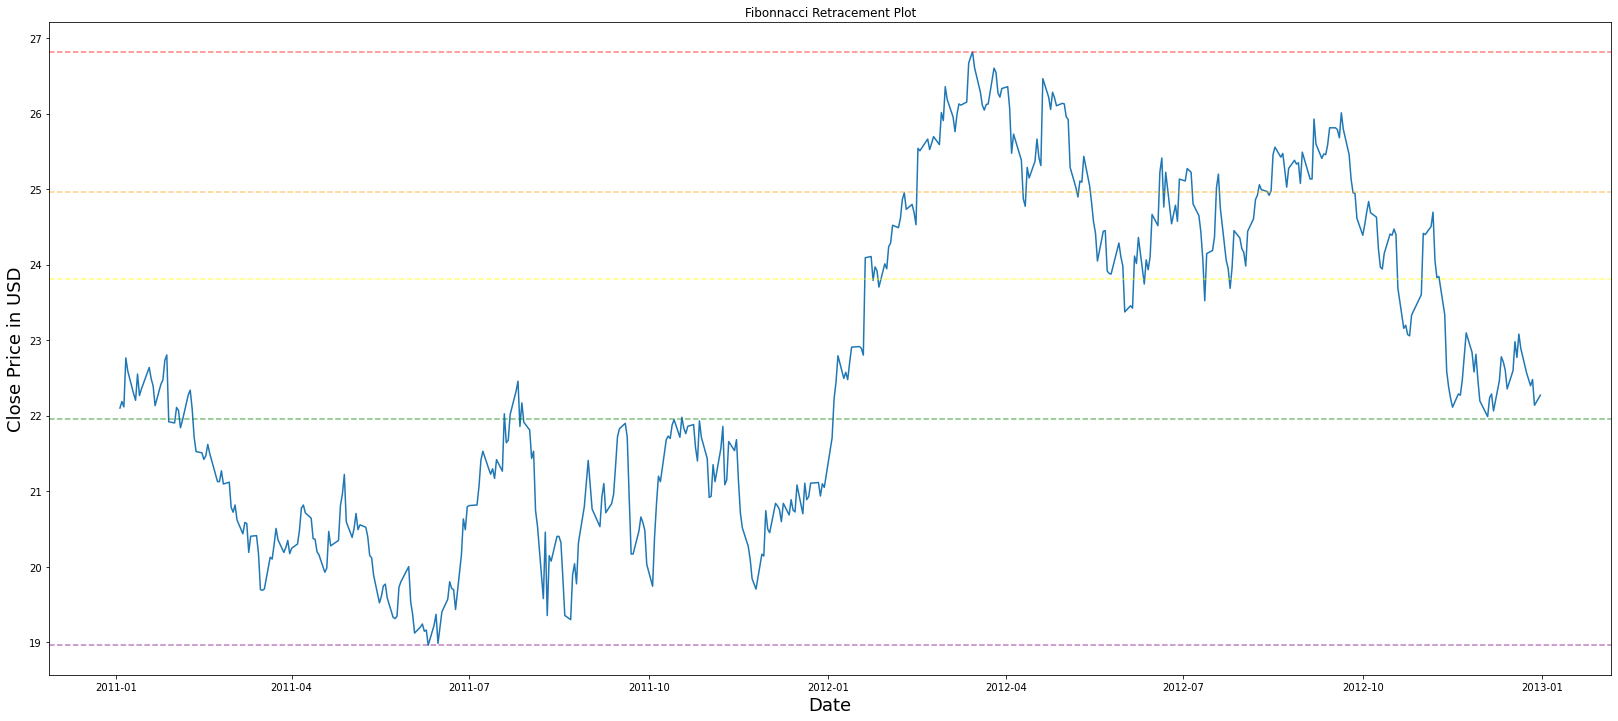

In [70]:
calculate_fibonacci_rates('2011', '2012')

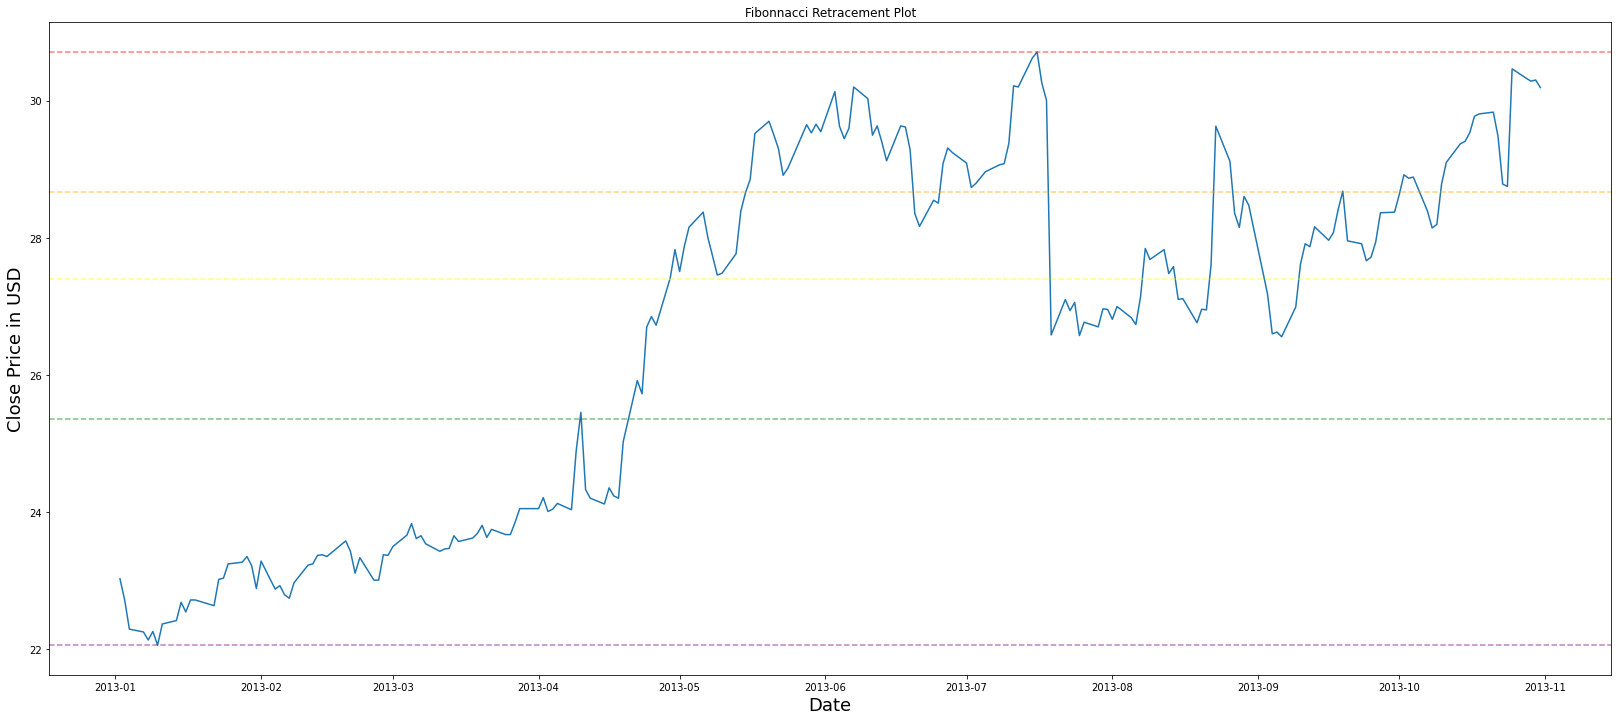

In [72]:
calculate_fibonacci_rates('2013', '2013-10')

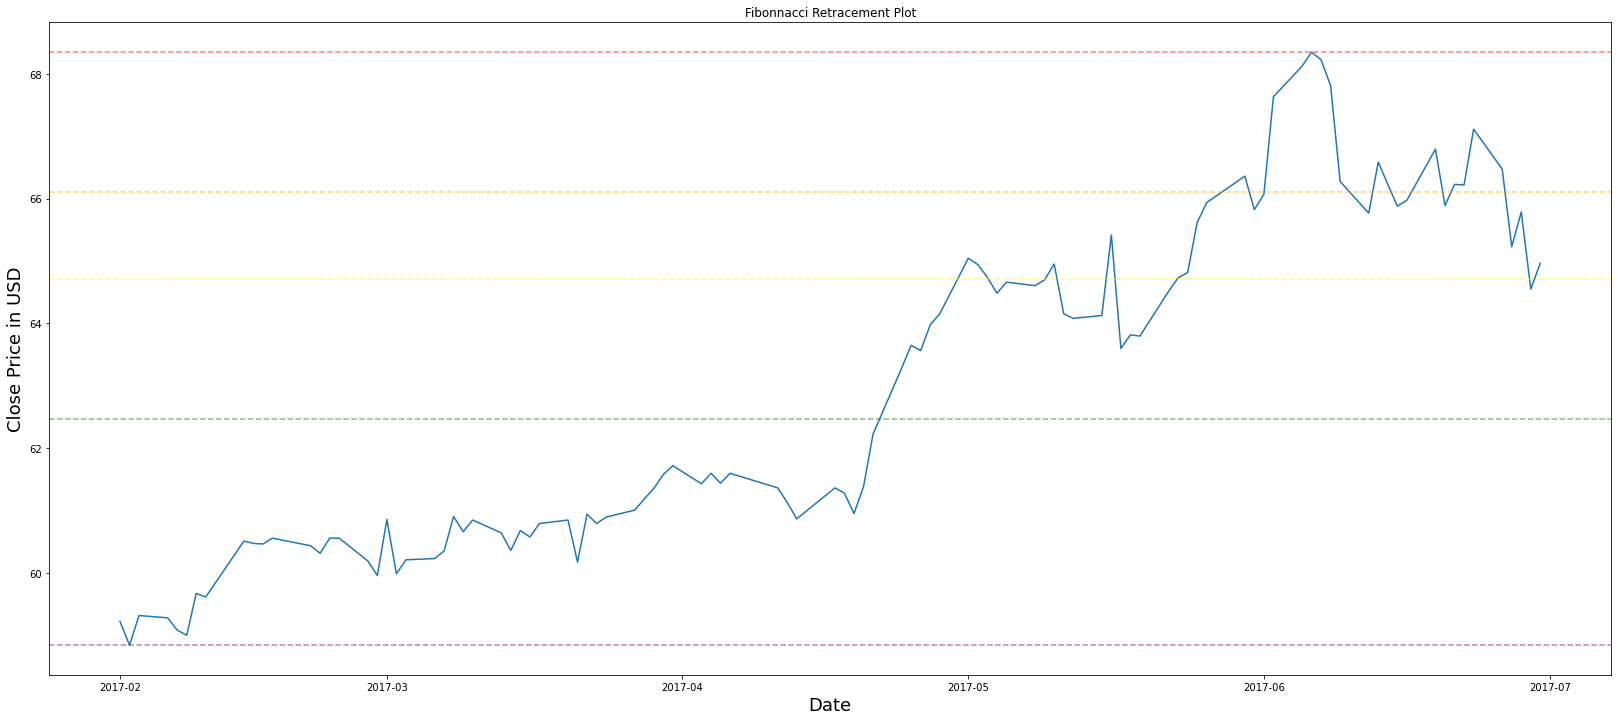

In [77]:
calculate_fibonacci_rates('2017-02', '2017-06')

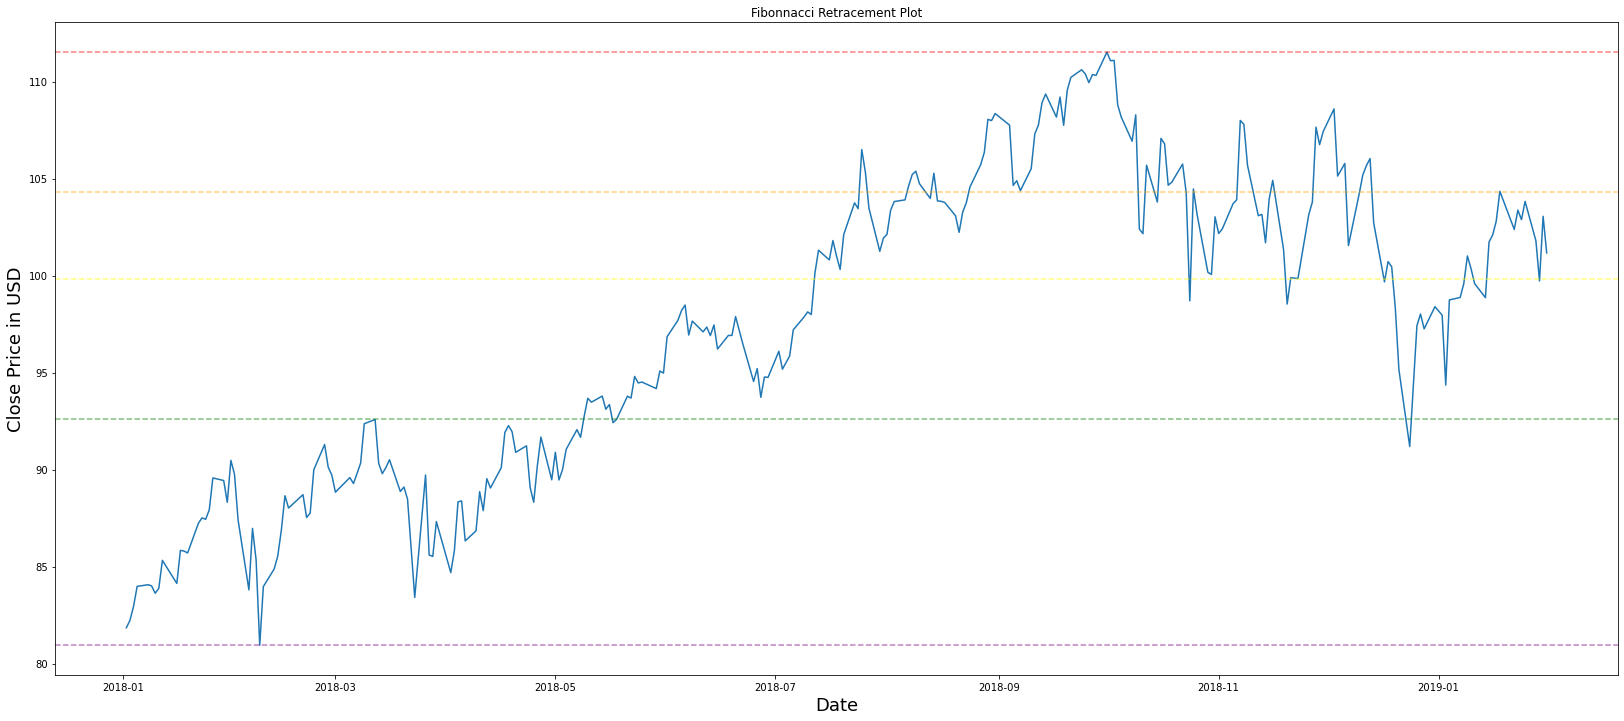

In [80]:
calculate_fibonacci_rates('2018', '2019-01')

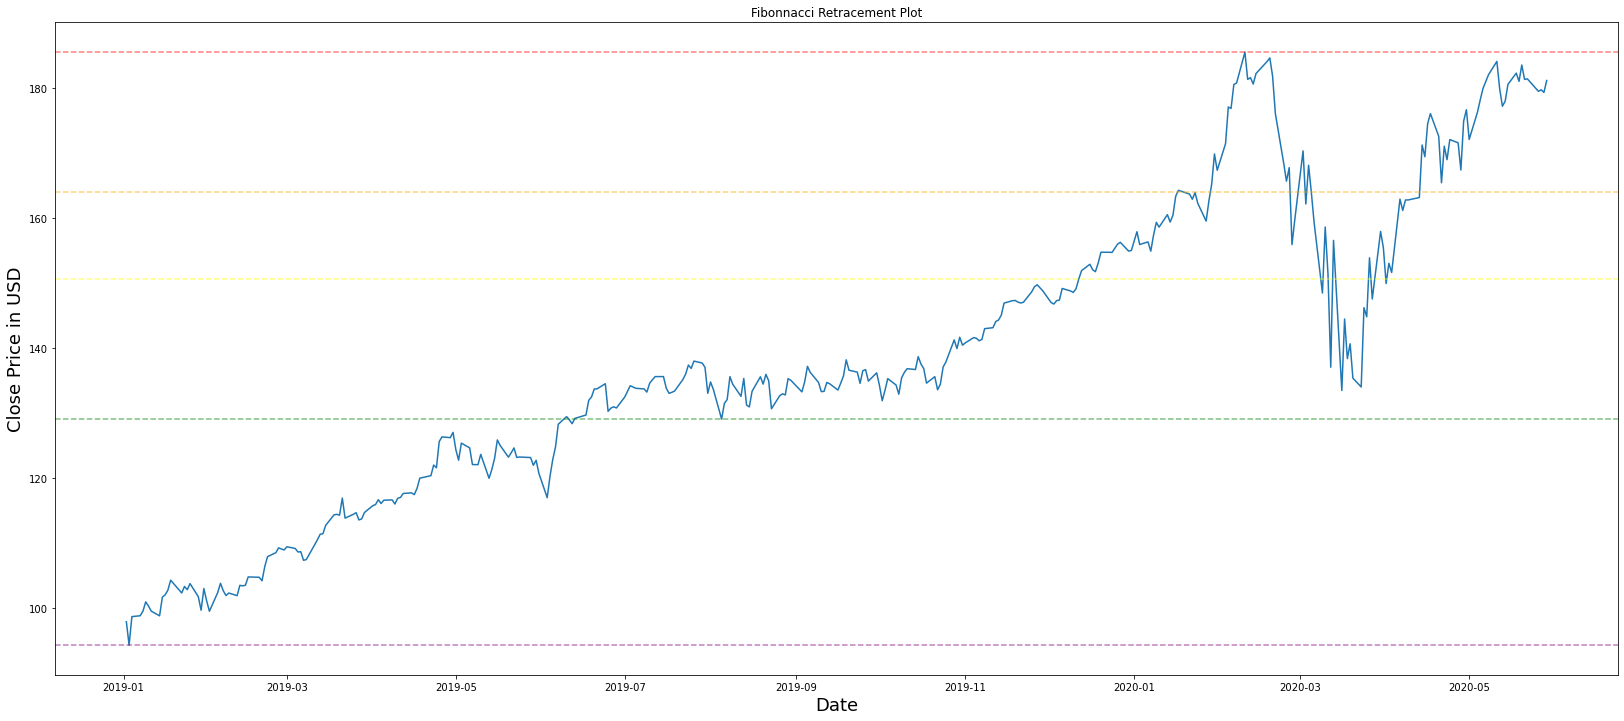

In [83]:
calculate_fibonacci_rates('2019', '2020-05')

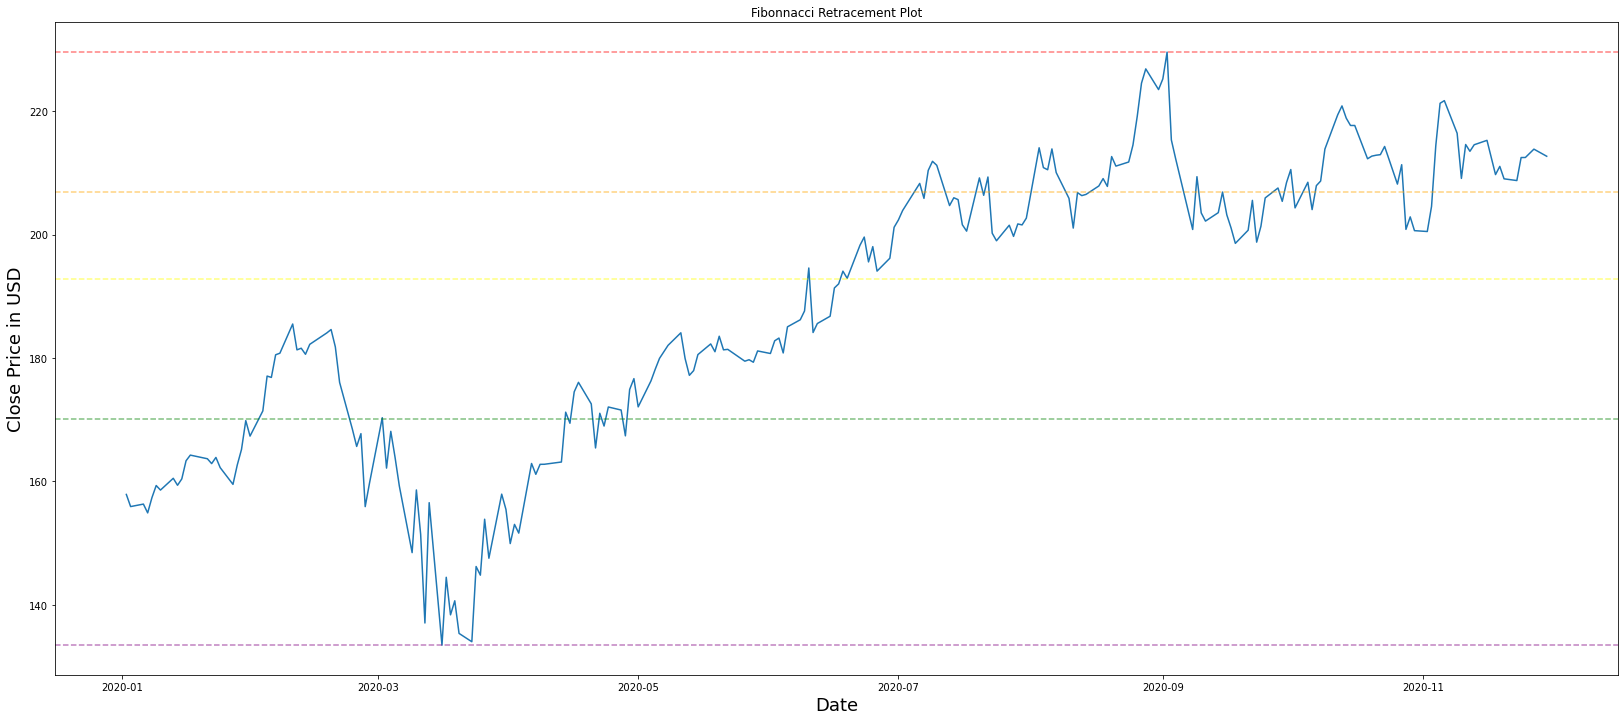

In [88]:
calculate_fibonacci_rates('2020', '2020-11')

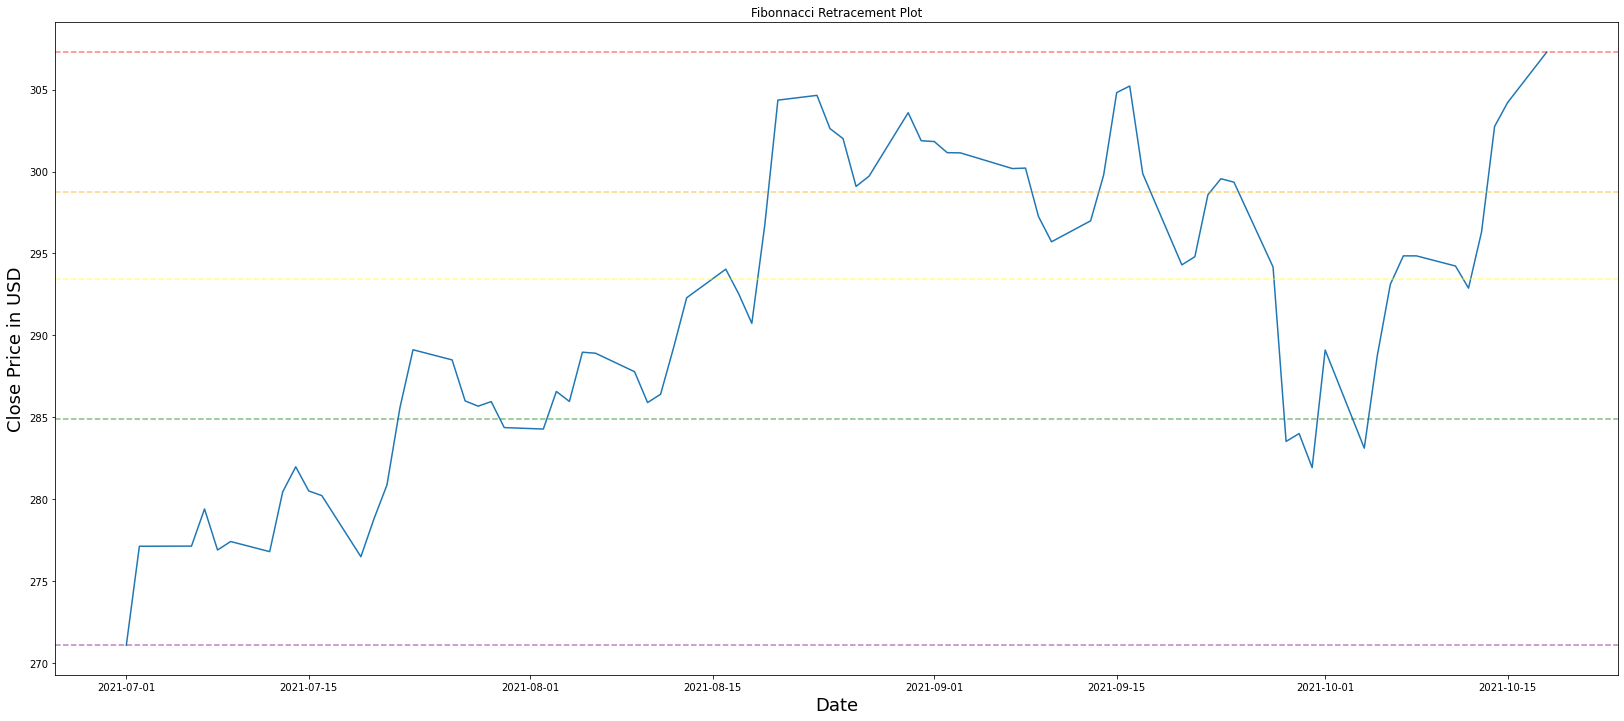

In [92]:
calculate_fibonacci_rates('2021-07', '2021-10')